![](https://jumpstartyourheart.org/wp-content/uploads/2018/11/penn-research-team-identifies-novel-therapeutic-target-for-heart-disease.jpg)

**Attribute Information:**

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [2]:
#read the data and show the first 5 rows
import pandas as pd
import numpy as np
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#check for missing values and basic informations

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No NULL values.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Basic Plots

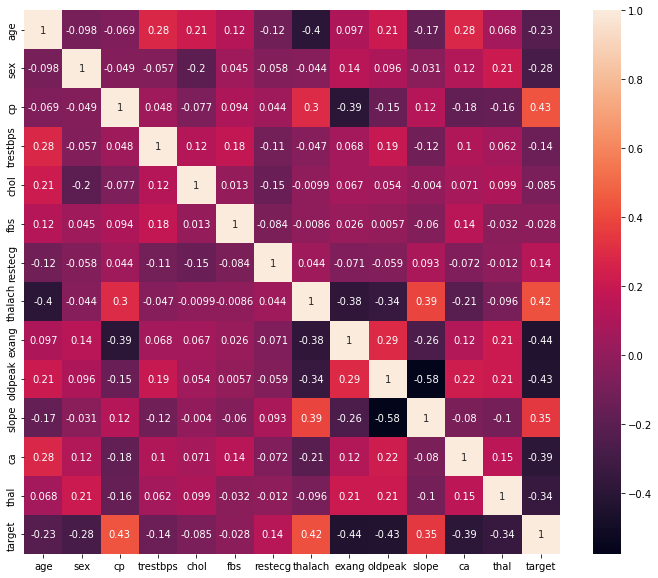

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True);

slope and old peak has high negative correlation of -0.58. This means if slope value increases then old peak will decrease and vice versa.

Target and cp(chest pain) has the highest positive correlation of 0.43.

Target and exang(exercise induced angina) has the highest negative correlation of -0.44.

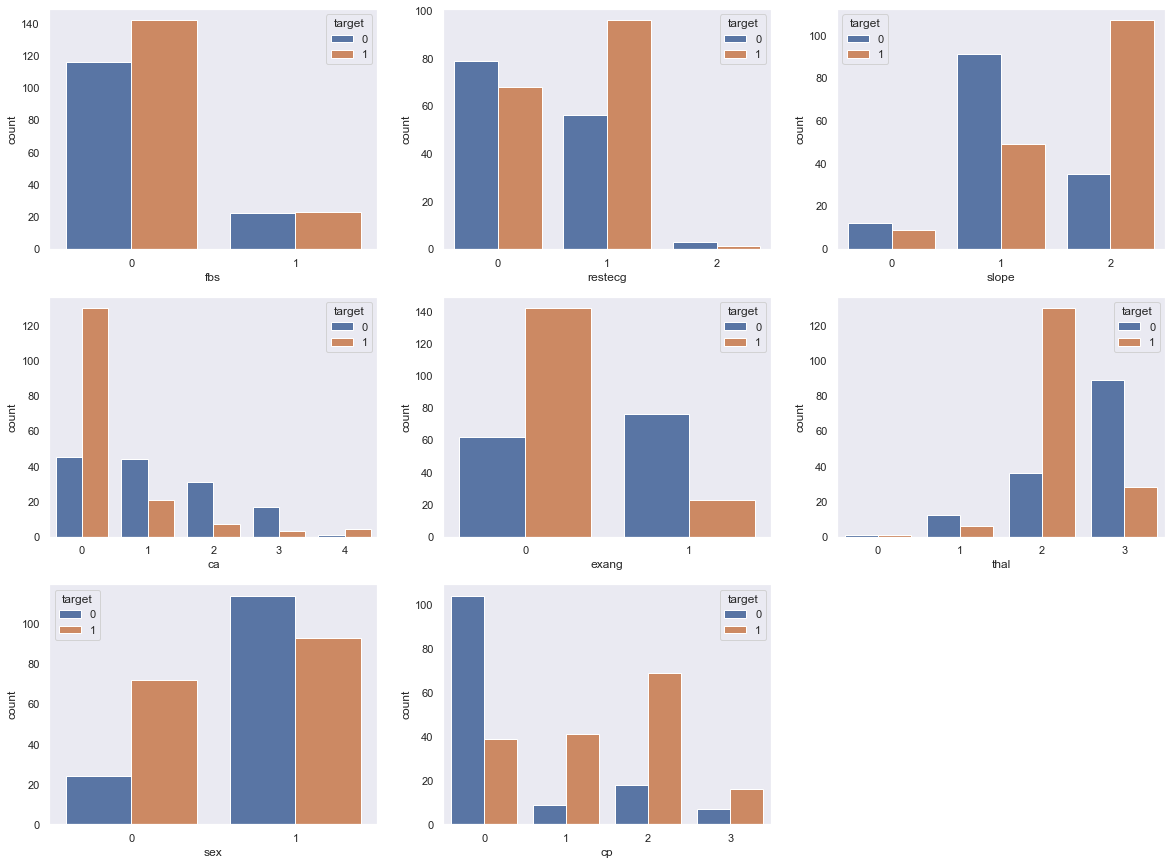

In [6]:
plt.figure(figsize=(20,15))
sns.set_theme(style='dark')
plt.subplot(3,3,1)
sns.countplot(data=df,x='fbs',hue='target')
plt.subplot(3,3,2)
sns.countplot(data=df,x='restecg',hue='target')
plt.subplot(3,3,3)
sns.countplot(data=df,x='slope',hue='target')
plt.subplot(3,3,4)
sns.countplot(data=df,x='ca',hue='target')
plt.subplot(3,3,5)
sns.countplot(data=df,x='exang',hue='target')
plt.subplot(3,3,6)
sns.countplot(data=df,x='thal',hue='target')
plt.subplot(3,3,7)
sns.countplot(data=df,x='sex',hue='target')
plt.subplot(3,3,8)
sns.countplot(data=df,x='cp',hue='target')
plt.show()

This plot depicts an important relationship.

As we can see from the first graph, fbs(fasting blood sugar) has no effect on target.
As we can see from the second graph, whenever restecg(resting electrocardiographic results) is of Type 1 then there will be a high chance of a disease as compare to other types.<br>
As we can see from the thrid graph, whenever slope(the slope of the peak exercise ST segment) is of Type 2 then there will be a high chance of a disease as compare to other types.<br>
As we can see from the fourth graph, whenever ca(number of major vessels (0-3) colored by flourosopy) is of Type 0 and Type 4 then there will be a high chance of a disease as compare to other types.<br>
As we can see from the fifth graph, whenever exang(exercise induced angina (1 = yes; 0 = no)) is of Type 0 then there will be a high chance of a disease as compare to other type 1.<br>
As we can see from the sixth graph, whenever thal(Thallium Stress Test Result) is of Type 2 then there will be a high chance of a disease as compare to other types.<br>
where, 0 maps to null in the original dataset.<br>
1 maps to 6 in the original dataset. This means that a fixed defect was found.<br>
2 maps to 3 in the original dataset. This means that the blood flow was normal.<br>
3 maps to 7 in the original dataset. This means that a reversible defect was found.<br>.

As we can see from the seventh graph, female have a high chance of being diagnosed with heart disease<br>
As we can see from the eighth graph, whenever cp(chest pain type) is of Type 0 there will be a less chance of having a disease.

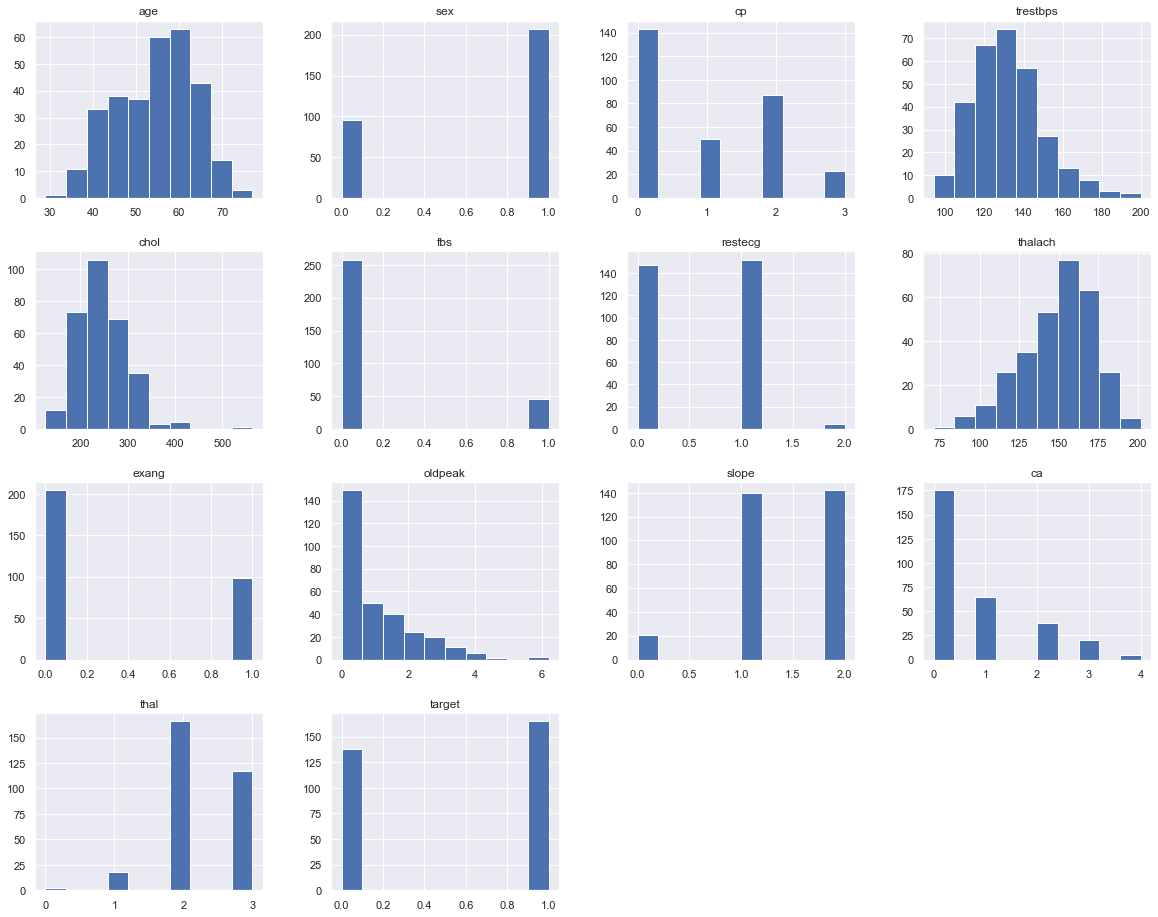

In [7]:
df.hist(figsize=(20,16))
plt.show();

From the above graphs I'm showing the distribution of data<br>

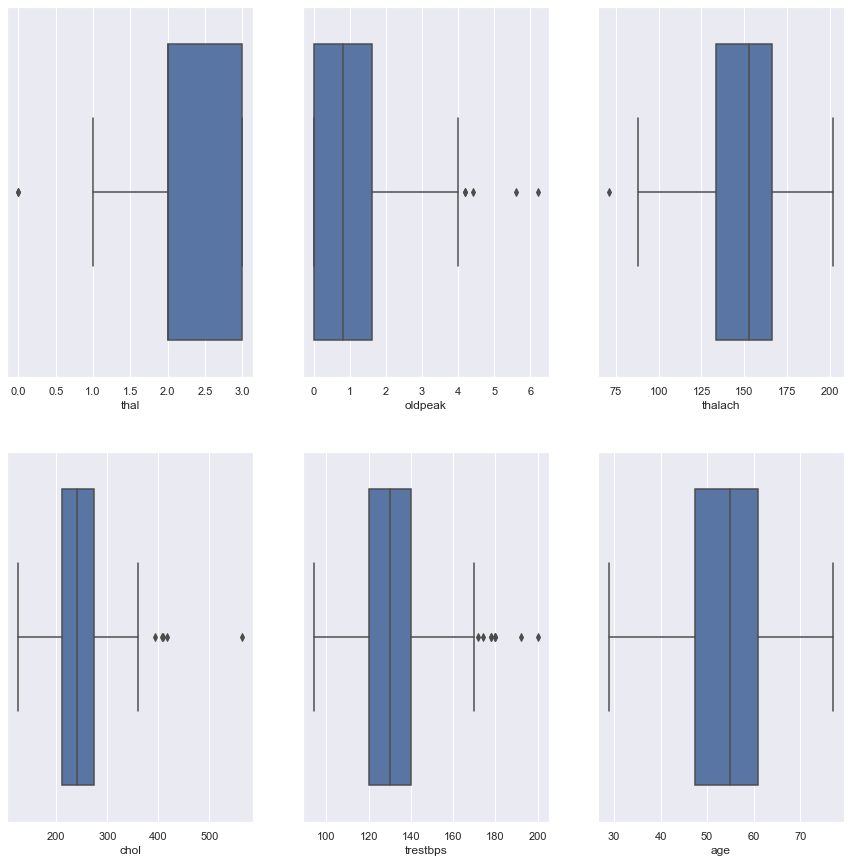

In [8]:
plt.figure(figsize=(15,15))

sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.boxplot(x='thal',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='oldpeak',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='thalach',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='chol',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='trestbps',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='age',data=df)
plt.show()

The middle line in boxplot represents median value, the dots outside represents outliers

# Scaling after train_test_split

In [9]:
X = df.drop(['target'], axis = 1)
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#imports

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report

# Applying diiferent models

In [11]:
models = []
models.append(['RidgeClassifier',RidgeClassifier()])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])


In [12]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print("Classification Report:- ")
    print(classification_report(y_test,y_pred))
    
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    #lst_2.append(accuracies.mean()*100)
    lst_2.append(roc)
    lst_1.append(lst_2)

RidgeClassifier :
[[15  3]
 [ 4 24]]
Accuracy Score:  0.8478260869565217

ROC AUC Score: 0.85

Classification Report:- 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.89      0.86      0.87        28

    accuracy                           0.85        46
   macro avg       0.84      0.85      0.84        46
weighted avg       0.85      0.85      0.85        46

----------------------------------------

KNeigbors :
[[16  2]
 [ 4 24]]
Accuracy Score:  0.8695652173913043

ROC AUC Score: 0.87

Classification Report:- 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.92      0.86      0.89        28

    accuracy                           0.87        46
   macro avg       0.86      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

----------------------------------------

GaussianNB :
[[15  3]
 [ 6 2

In [13]:
df2 = pd.DataFrame(lst_1,columns=['Model', 'Accuracy', 'ROC_AUC'])

df2.sort_values(by=['ROC_AUC'],inplace=True,ascending=False)
df2

,Model,Accuracy,ROC_AUC
1,KNeigbors,86.956522,0.873016
0,RidgeClassifier,84.782609,0.845238
4,RandomForest,84.782609,0.835317
2,GaussianNB,80.434783,0.809524
3,DecisionTree,80.434783,0.809524


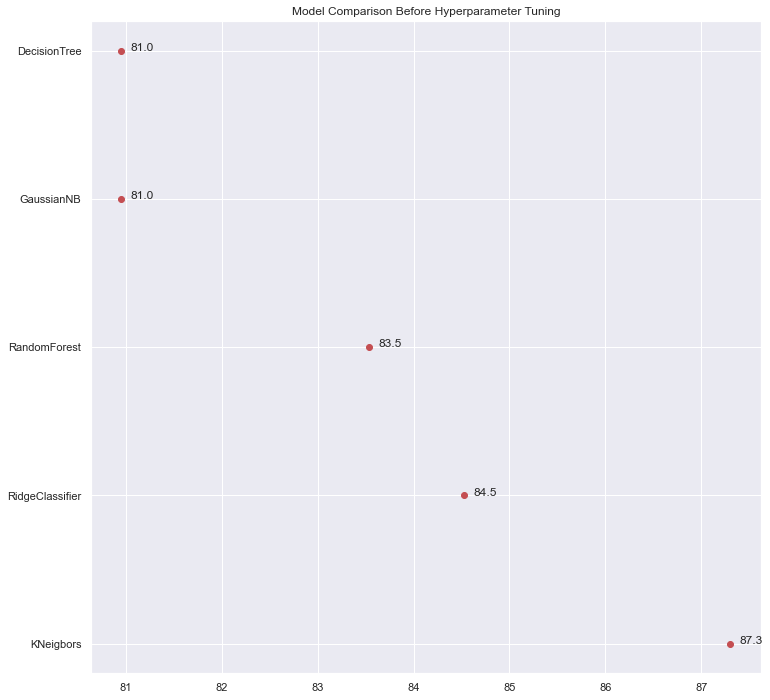

In [43]:
fig = plt.figure(figsize=(12,12))
plt.plot(df2['ROC_AUC']*100, df2['Model'], 'ro')
for a,b in zip(df2['ROC_AUC']*100, df2['Model']): 
    plt.text(a+0.1, b, str(round(a,1)))
plt.title('Model Comparison Before Hyperparameter Tuning');

In [15]:
grid_models = [
               (KNeighborsClassifier(),[{'n_neighbors':np.arange(1, 100), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'], 'min_samples_leaf':[2, 10, 30]}]),
               (RidgeClassifier(),[{'alpha':[0.1,0.5,1], 'solver':['auto', 'svd', 'cholesky']}]),
               (GaussianNB(),[{'var_smoothing': np.logspace(0,-9, num=100)}]),
               ]

In [16]:
li11 = []
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'roc_auc',cv = 5)
    grid.fit(X_train,y_train)
    best_score = grid.best_score_
    best_param = grid.best_params_
    li11.append(best_score*100)
    print(' {}: \n Best score: {:.1f} %'.format(i,best_score*100))
    print(' Best parameter: {} '.format(best_param))
    print('')
    print('-'*25)
    print('')

 KNeighborsClassifier(): 
 Best score: 93.1 %
 Best parameter: {'metric': 'manhattan', 'n_neighbors': 19} 

-------------------------

 DecisionTreeClassifier(): 
 Best score: 84.3 %
 Best parameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2} 

-------------------------

 RandomForestClassifier(): 
 Best score: 92.3 %
 Best parameter: {'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 100} 

-------------------------

 RidgeClassifier(): 
 Best score: 89.1 %
 Best parameter: {'alpha': 1, 'solver': 'auto'} 

-------------------------

 GaussianNB(): 
 Best score: 90.4 %
 Best parameter: {'var_smoothing': 0.8111308307896871} 

-------------------------



In [17]:
li12 = []
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'roc_auc',cv = 10)
    grid.fit(X_train,y_train)
    best_score = grid.best_score_
    best_param = grid.best_params_
    li12.append(best_score*100)
    print(' {}: \n Best score: {:.1f} %'.format(i,best_score*100))
    print(' Best parameter: {} '.format(best_param))
    print('')
    print('-'*25)
    print('')

 KNeighborsClassifier(): 
 Best score: 93.2 %
 Best parameter: {'metric': 'manhattan', 'n_neighbors': 21} 

-------------------------

 DecisionTreeClassifier(): 
 Best score: 84.0 %
 Best parameter: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4} 

-------------------------

 RandomForestClassifier(): 
 Best score: 92.7 %
 Best parameter: {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 200} 

-------------------------

 RidgeClassifier(): 
 Best score: 90.8 %
 Best parameter: {'alpha': 0.5, 'solver': 'auto'} 

-------------------------

 GaussianNB(): 
 Best score: 90.6 %
 Best parameter: {'var_smoothing': 1.0} 

-------------------------



In [18]:
li13 = []
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'roc_auc',cv = 15)
    grid.fit(X_train,y_train)
    best_score = grid.best_score_
    best_param = grid.best_params_
    li13.append(best_score*100)
    print(' {}: \n Best score: {:.1f} %'.format(i,best_score*100))
    print(' Best parameter: {} '.format(best_param))
    print('')
    print('-'*25)
    print('')

 KNeighborsClassifier(): 
 Best score: 92.4 %
 Best parameter: {'metric': 'manhattan', 'n_neighbors': 21} 

-------------------------

 DecisionTreeClassifier(): 
 Best score: 85.7 %
 Best parameter: {'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 4} 

-------------------------

 RandomForestClassifier(): 
 Best score: 92.1 %
 Best parameter: {'criterion': 'entropy', 'min_samples_leaf': 10, 'n_estimators': 150} 

-------------------------

 RidgeClassifier(): 
 Best score: 89.7 %
 Best parameter: {'alpha': 0.1, 'solver': 'auto'} 

-------------------------

 GaussianNB(): 
 Best score: 90.1 %
 Best parameter: {'var_smoothing': 0.657933224657568} 

-------------------------



In [19]:
print(li11, li12, li13)

[93.07153880070548, 84.28350970017637, 92.3070987654321, 89.11044973544972, 90.37918871252204] [93.24633699633699, 83.97435897435898, 92.67857142857142, 90.82875457875457, 90.63186813186812] [92.38888888888889, 85.68981481481482, 92.10185185185186, 89.72222222222221, 90.13888888888889]


In [20]:
lii = zip(li11, li12, li13)
df_curve = pd.DataFrame(lii, columns = ['cv=5', 'cv=10', 'cv=15'], index = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RidgeClassifier', 'GaussianNB'])
df_curve

,cv=5,cv=10,cv=15
KNeighborsClassifier,93.071539,93.246337,92.388889
DecisionTreeClassifier,84.283510,83.974359,85.689815
RandomForestClassifier,92.307099,92.678571,92.101852
RidgeClassifier,89.110450,90.828755,89.722222
GaussianNB,90.379189,90.631868,90.138889


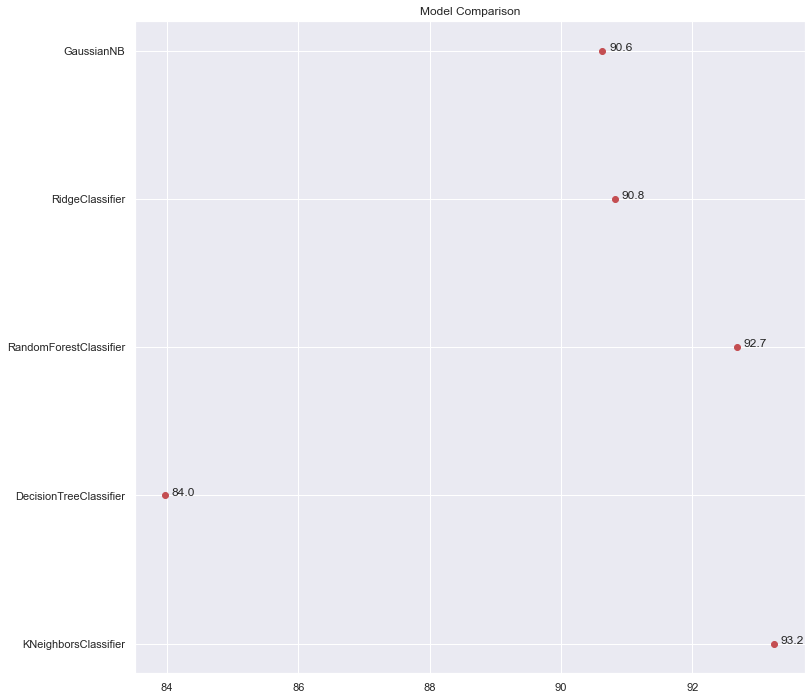

In [32]:
fig = plt.figure(figsize=(12,12))
plt.plot(df_curve['cv=10'], df_curve.index, 'ro')
for a,b in zip(df_curve['cv=10'], df_curve.index): 
    plt.text(a+0.1, b, str(round(a, 1)))
plt.title('Model Comparison');